#### Introduction 

This dataset is a collection of basic but crucial stats of the English Premier League 2020-21 season. The dataset has all the players that played in the EPL and their standard stats such as Goals, Assists, xG, xA, Passes Attempted, Pass Accuracy and more

#### Project Details

The tasks for this project were:

>Data wrangling, which consists of:
   - Gathering data (Kaggle)
   - Assessing data
   - Cleaning data
   - Storing, analyzing, and visualizing our wrangled data
    


In [88]:
# Import necessary libraries for initial data understanding, visualisations and exploratory data analysis
import numpy as np
import pandas as pd

#For Visuals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [89]:
# reads the data from the file - denotes as CSV, it has no header row, sets column headers as a Pandas DataFrame

df = pd.read_csv('EPL_20_21.csv')

###### Now let's take our first look at the data.

In [90]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [91]:
# Show me the shape of the data
df.shape

(532, 18)

In [92]:
# Show me the complete column list
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

In [93]:
df.dtypes

Name                      object
Club                      object
Nationality               object
Position                  object
Age                        int64
Matches                    int64
Starts                     int64
Mins                       int64
Goals                      int64
Assists                    int64
Passes_Attempted           int64
Perc_Passes_Completed    float64
Penalty_Goals              int64
Penalty_Attempted          int64
xG                       float64
xA                       float64
Yellow_Cards               int64
Red_Cards                  int64
dtype: object

In [95]:
# Show me the info properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [96]:
#Show me the number of unique values
df.nunique()

Name                     524
Club                      20
Nationality               59
Position                  10
Age                       23
Matches                   38
Starts                    39
Mins                     458
Goals                     21
Assists                   13
Passes_Attempted         449
Perc_Passes_Completed    261
Penalty_Goals              9
Penalty_Attempted          8
xG                        61
xA                        37
Yellow_Cards              13
Red_Cards                  3
dtype: int64

#### Assess Data Quality

Examine the quality of the data, addressing questions such as:

 - Is the data complete (does it cover all the cases required)?
 - Is it correct, or does it contain errors and, if there are errors, how common are they?
 - Are there missing values in the data? If so, how are they represented, where do they occur, and how common are they?


In [97]:
df.sample(10)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
365,Martin Kelly,Crystal Palace,ENG,DF,30,1,0,2,0,0,2,100.0,0,0,0.00,0.00,0,0
311,Dwight Gayle,Newcastle United,ENG,"FW,MF",29,18,4,514,1,1,114,79.8,0,0,0.36,0.09,0,0
127,Christian Fuchs,Leicester City,AUT,DF,34,9,8,702,0,0,589,81.2,0,0,0.01,0.00,4,0
417,Percy Tau,Brighton,RSA,"FW,MF",26,3,1,103,0,1,29,75.9,0,0,0.00,0.27,0,0
193,Emile Smith-Rowe,Arsenal,ENG,"MF,FW",20,20,18,1440,2,4,724,87.7,0,0,0.13,0.18,0,0
380,Ibrahima Diallo,Southampton,FRA,MF,21,22,10,1020,0,0,587,85.2,0,0,0.05,0.05,3,0
451,Joachim Andersen,Fulham,DEN,DF,24,31,30,2730,1,1,1833,83.4,0,0,0.04,0.02,7,1
186,Rob Holding,Arsenal,ENG,DF,24,30,28,2558,0,1,1768,89.3,0,0,0.04,0.01,2,0
398,Leandro Trossard,Brighton,BEL,"FW,MF",25,35,30,2607,5,5,1085,74.9,0,0,0.18,0.15,2,0
29,Rodri,Manchester City,ESP,MF,24,34,31,2748,2,2,2728,91.5,1,1,0.08,0.06,6,0


In [98]:
df.describe(include=float).T

,count,mean,std,min,25%,50%,75%,max
Perc_Passes_Completed,532.0,77.823872,13.011631,-1.0,73.50,79.20,84.625,100.00
xG,532.0,0.113289,0.148174,0.0,0.01,0.06,0.150,1.16
xA,532.0,0.072650,0.090072,0.0,0.00,0.05,0.110,0.90


In [99]:
df.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
Age,532.0,25.500000,4.319404,16.0,22.0,26.0,29.0,38.0
Matches,532.0,19.535714,11.840459,1.0,9.0,21.0,30.0,38.0
Starts,532.0,15.714286,11.921161,0.0,4.0,15.0,27.0,38.0
Mins,532.0,1411.443609,1043.171856,1.0,426.0,1345.0,2303.5,3420.0
Goals,532.0,1.853383,3.338009,0.0,0.0,1.0,2.0,23.0
Assists,532.0,1.287594,2.095191,0.0,0.0,0.0,2.0,14.0
Passes_Attempted,532.0,717.750000,631.372522,0.0,171.5,573.5,1129.5,3214.0
Penalty_Goals,532.0,0.191729,0.850881,0.0,0.0,0.0,0.0,9.0
Penalty_Attempted,532.0,0.234962,0.975818,0.0,0.0,0.0,0.0,10.0
Yellow_Cards,532.0,2.114662,2.269094,0.0,0.0,2.0,3.0,12.0


In [100]:
df.describe(include='object').T

,count,unique,top,freq
Name,532,524,Theo Walcott,2
Club,532,20,West Bromwich Albion,30
Nationality,532,59,ENG,192
Position,532,10,DF,178


#### Correlation Matrix

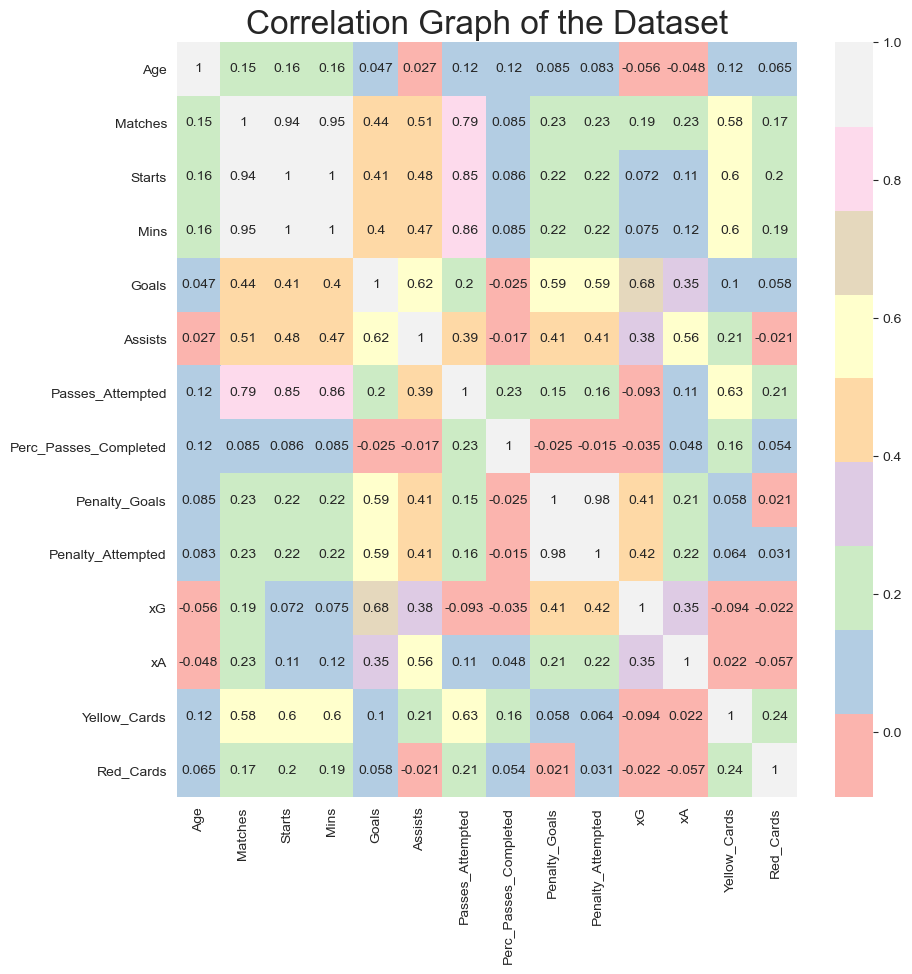

In [102]:
plt.figure(figsize=(10,10),dpi = 100);
correlation = sns.heatmap(df.corr(),annot=True,cmap='Pastel1');
correlation.set_title('Correlation Graph of the Dataset', fontdict={'fontsize': 24});

### Quality 

###### Missing Data 

In [103]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [104]:
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


- There is no null values in our columns

#### Duplicates

In [105]:
sum(df.duplicated())

0

In [106]:
sum(df.Name.duplicated())

8

- Let's drop these duplicated values in our datasets

In [107]:
df.drop_duplicates(subset=['Name'],inplace = True)

#### Test

In [108]:
sum(df.Name.duplicated())

0

#### Outliers 

we may also want to remove outliers. These can be due to typos in data entry, mistakes in units, or they could be legitimate but extreme values

In [109]:
#unusual names
df[df['Name'].apply(len) < 3]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards


In [110]:
#unusual Values Like Zeros
df[df['Perc_Passes_Completed'] == -1]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
182,Dane Scarlett,Tottenham Hotspur,ENG,FW,16,1,0,1,0,0,0,-1.0,0,0,0.0,0.0,0,0
531,Femi Seriki,Sheffield United,ENG,DF,17,1,0,1,0,0,0,-1.0,0,0,0.0,0.0,0,0


- There are some values with -1 % , which is not reasonable value.

> Let's drop these values for our dataset

In [111]:
df['Perc_Passes_Completed'] = df[~(df['Perc_Passes_Completed'] == -1)]

#### Test

In [112]:
#unusual Values Like Zeros
df[df['Perc_Passes_Completed'] == -1]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards


#### Age Distribution in the league

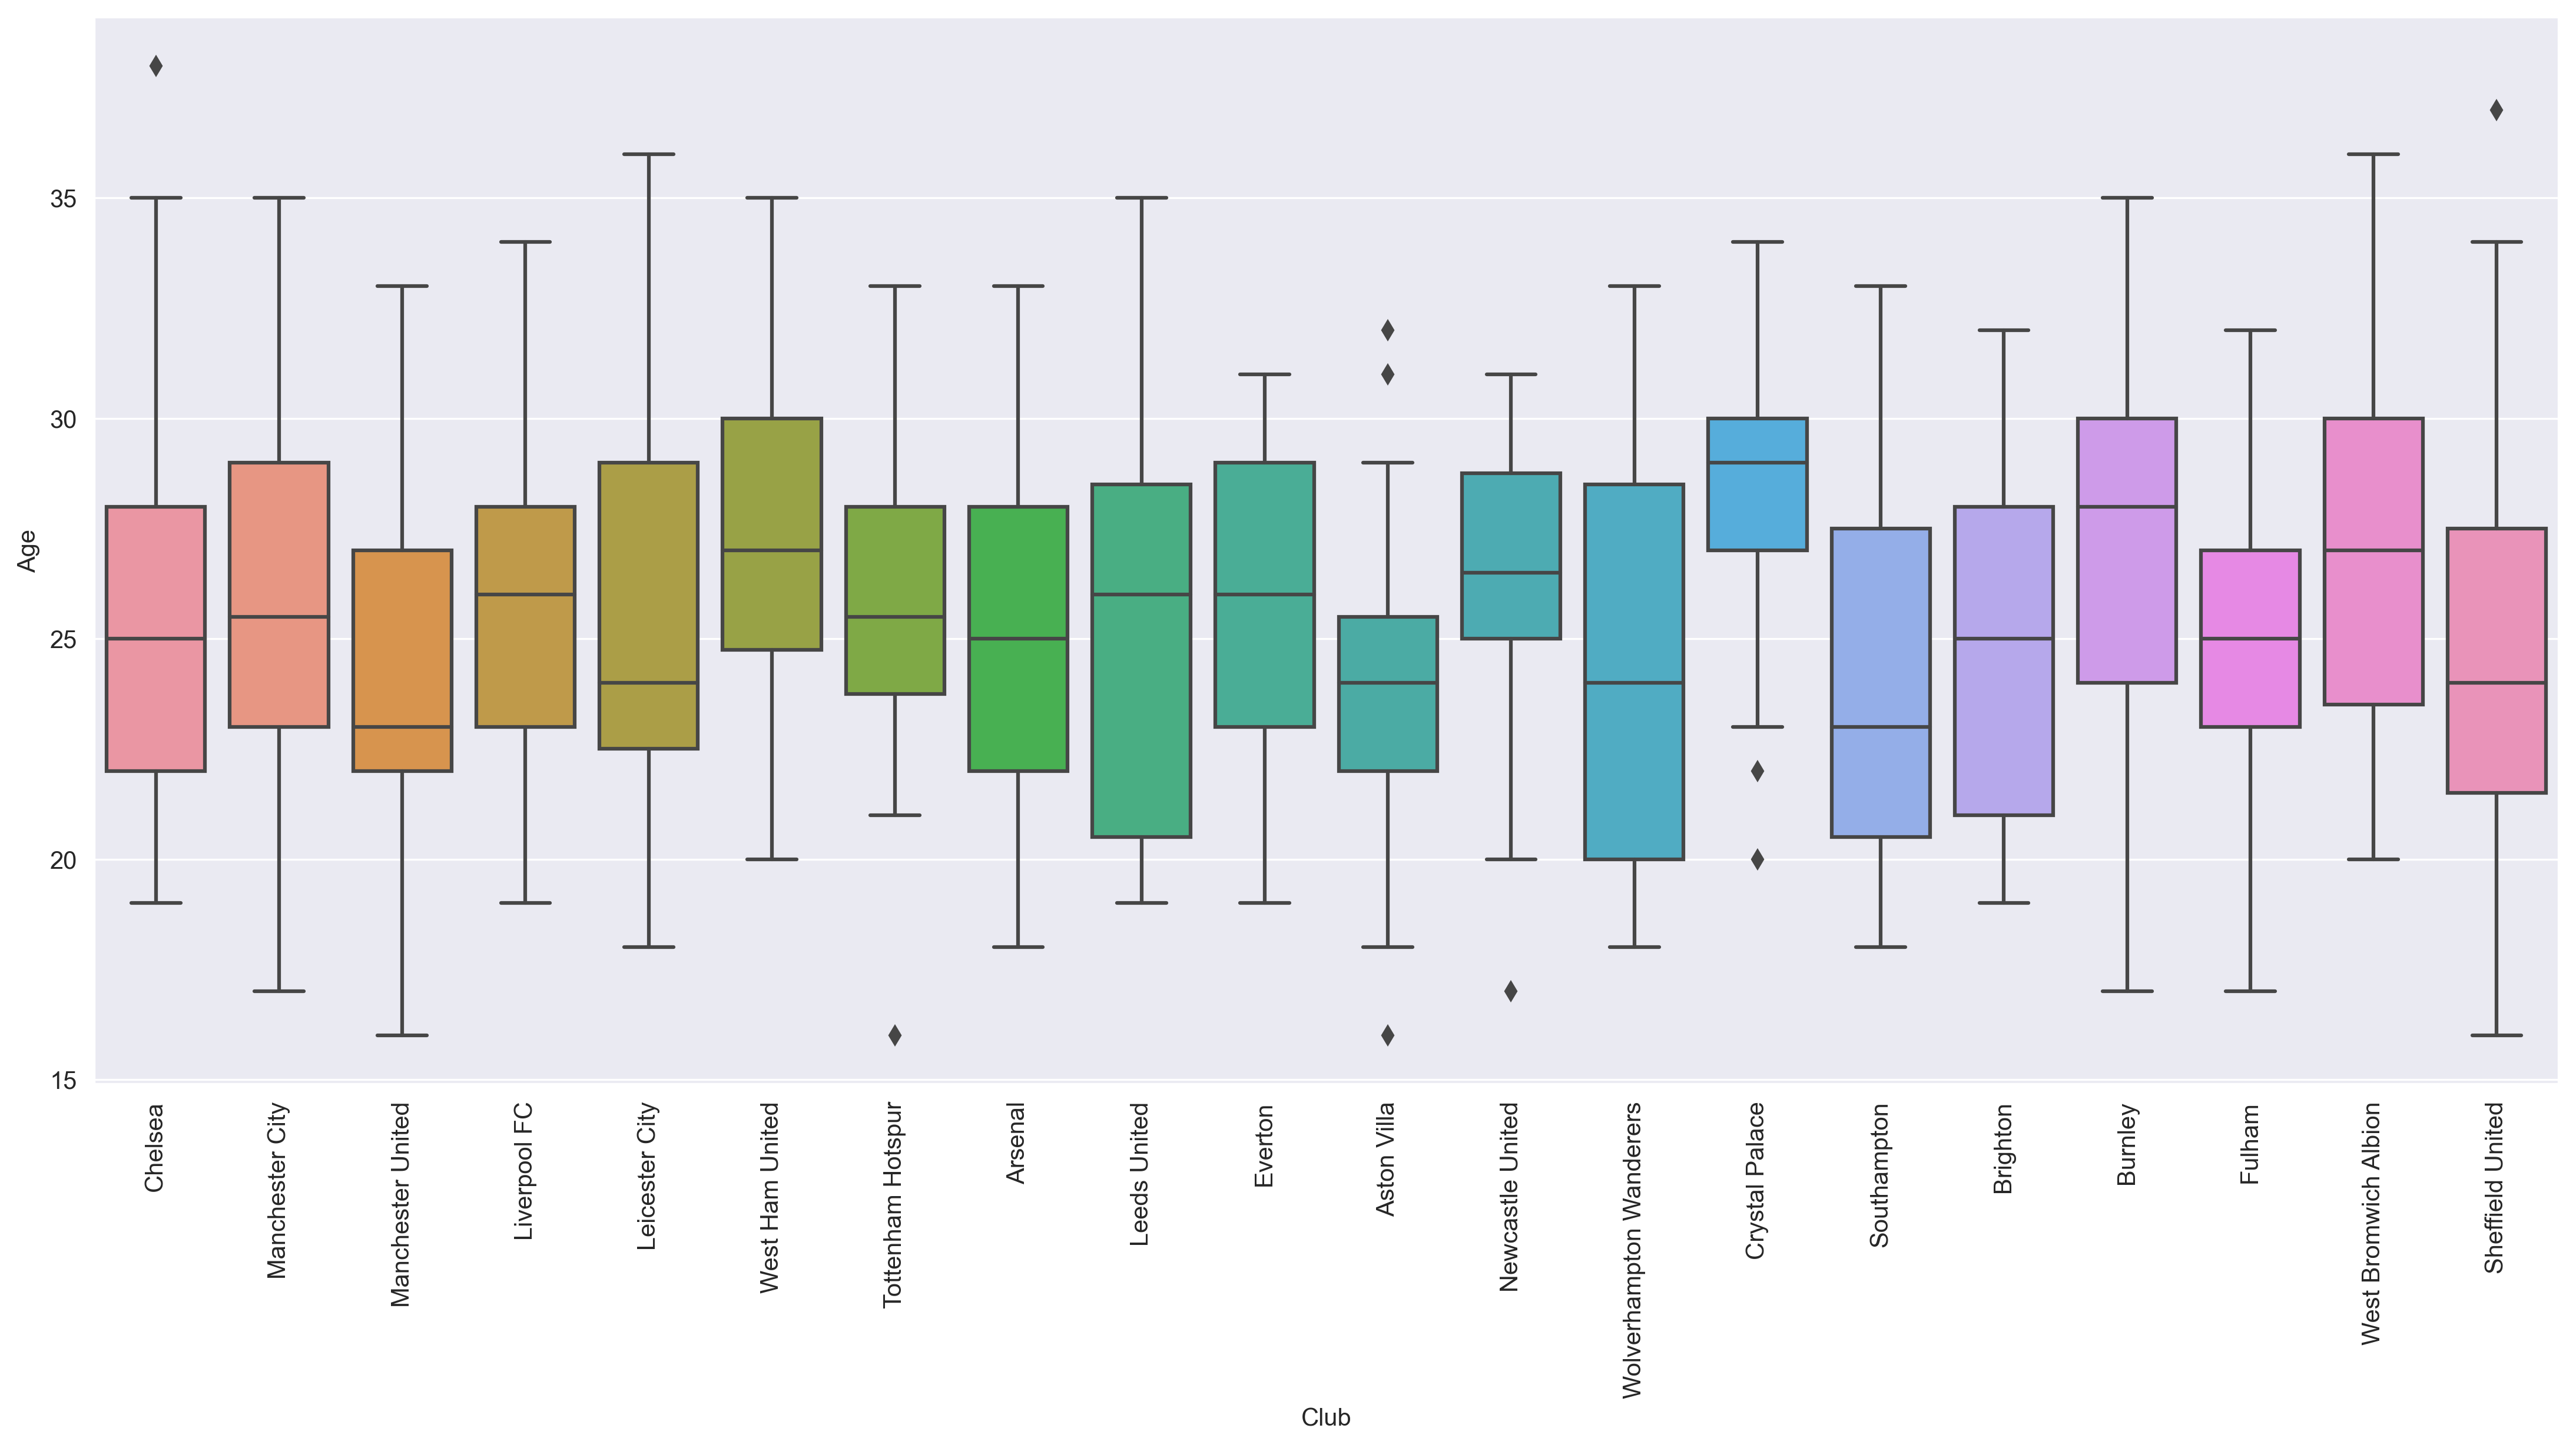

In [113]:
plt.figure(figsize=(18,8),dpi = 300)
sns.boxplot(x=df['Club'],y = df['Age'], data=df)
plt.xticks(rotation=90)
plt.show();

Machester United's average player age is the lowest amongst all the clubs in Premier League.

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


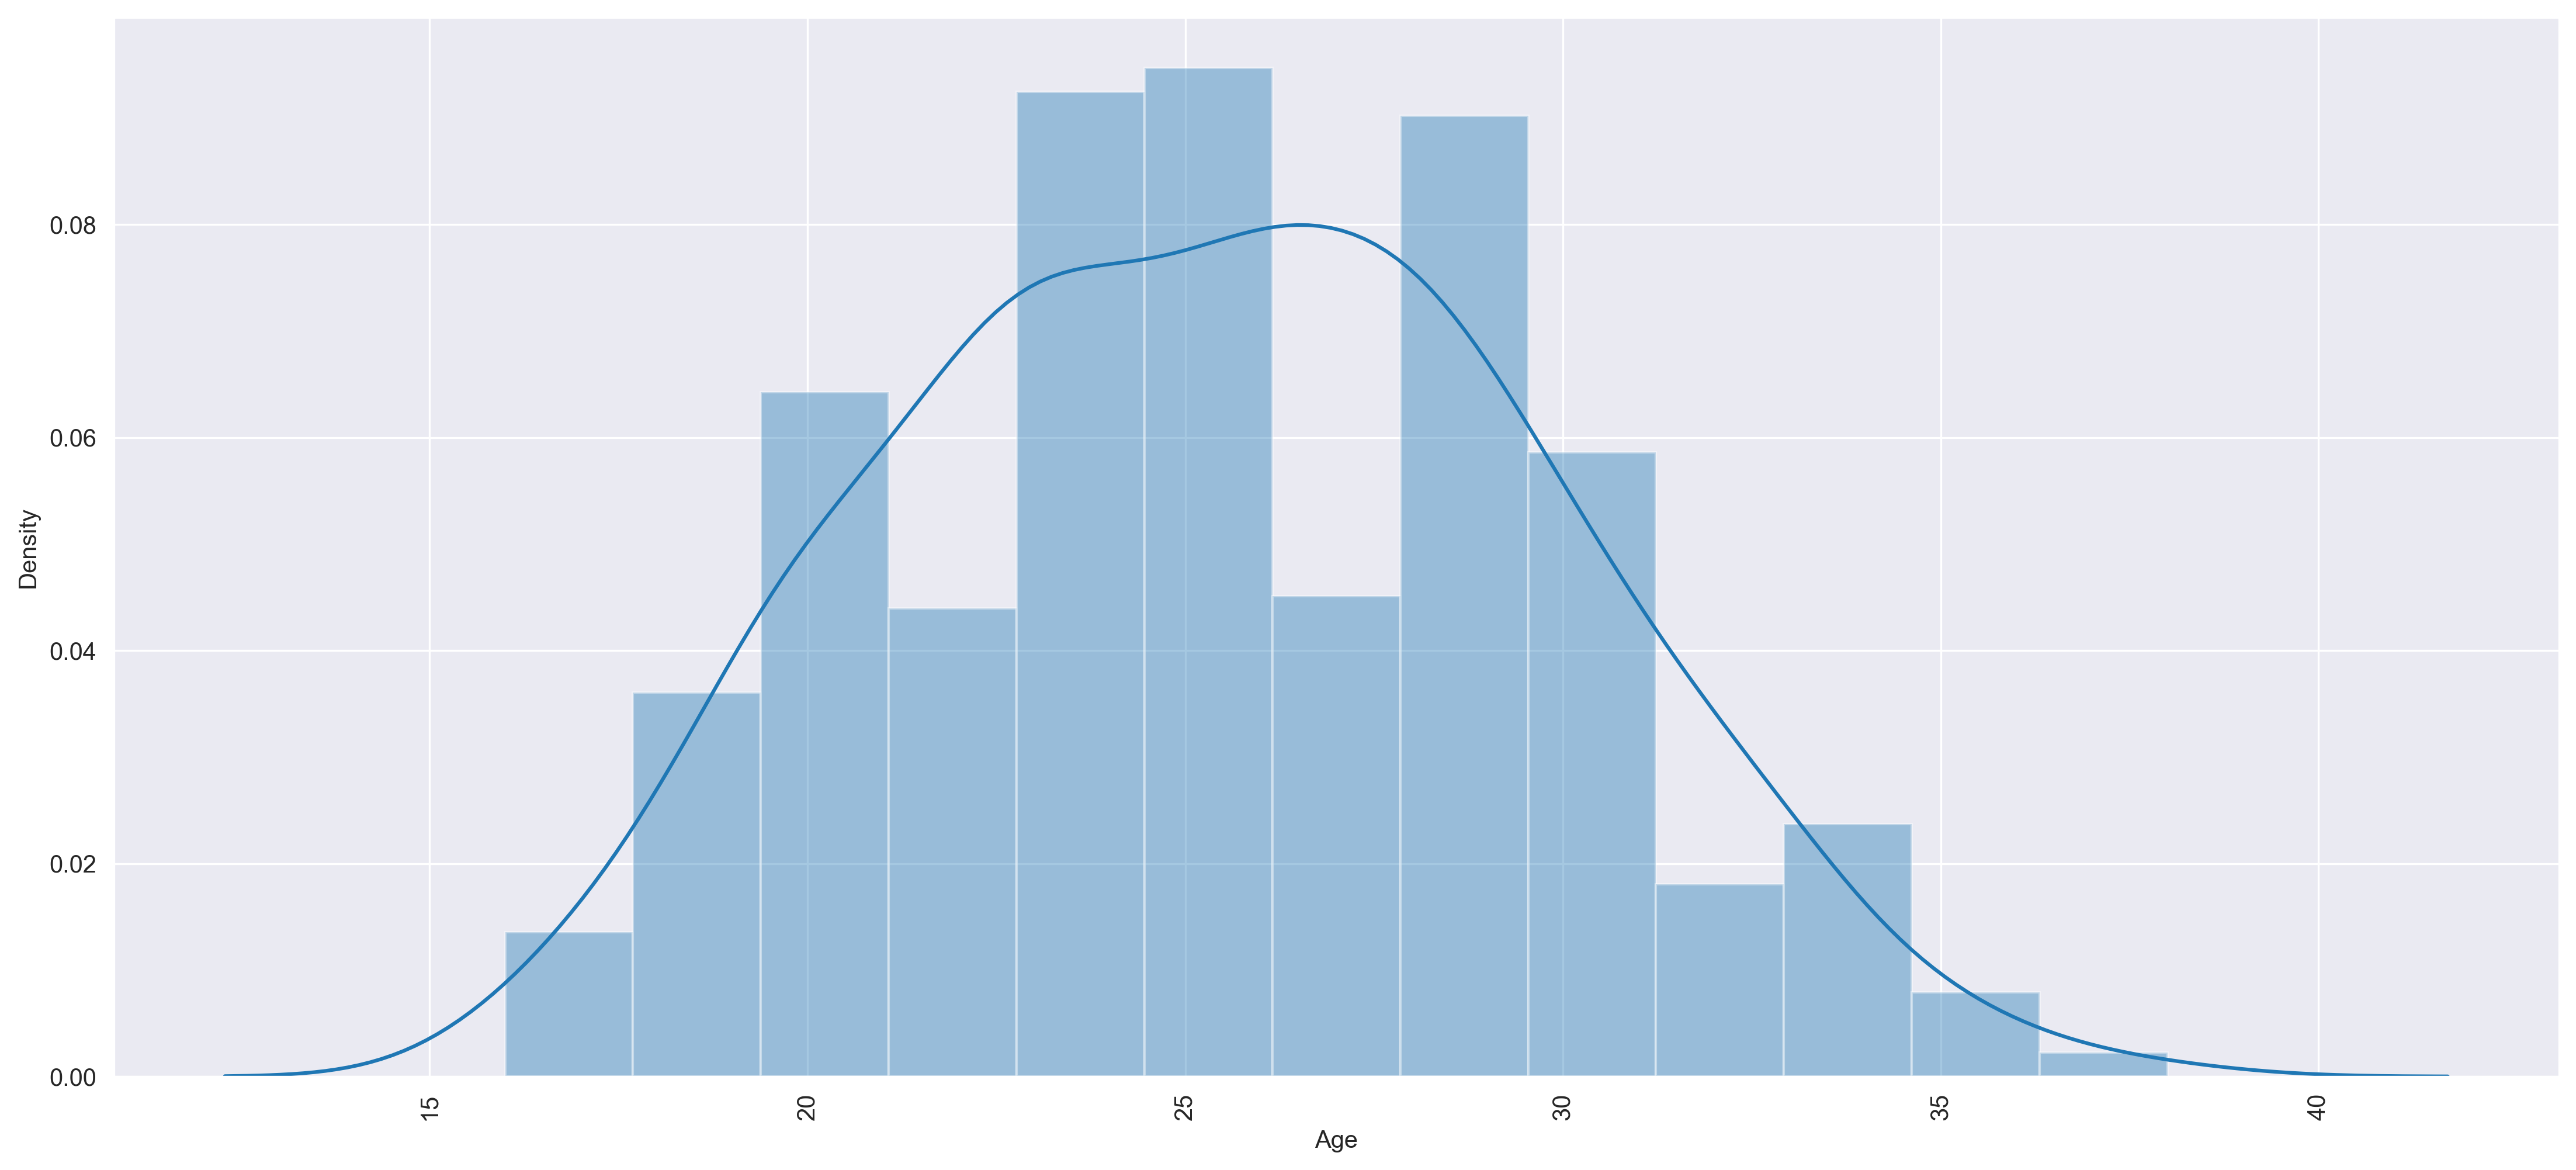

In [114]:
plt.figure(figsize=(18,8),dpi = 300)
sns.distplot(df['Age'])
plt.xticks(rotation=90)
plt.show();

### Goals Scored by Clubs

 - Which team scored the most goals during the season?

In [115]:
df.head(1)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,Mason Mount,1,1,0.21,0.24,2,0


In [116]:
Club_Goals = df.groupby('Club')['Goals'].sum().sort_values(ascending = False)
pd.DataFrame(Club_Goals)

,Goals
Club,
Manchester City,82
Manchester United,70
Tottenham Hotspur,66
Liverpool FC,65
Leicester City,64
Leeds United,60
West Ham United,60
Chelsea,56
Arsenal,53


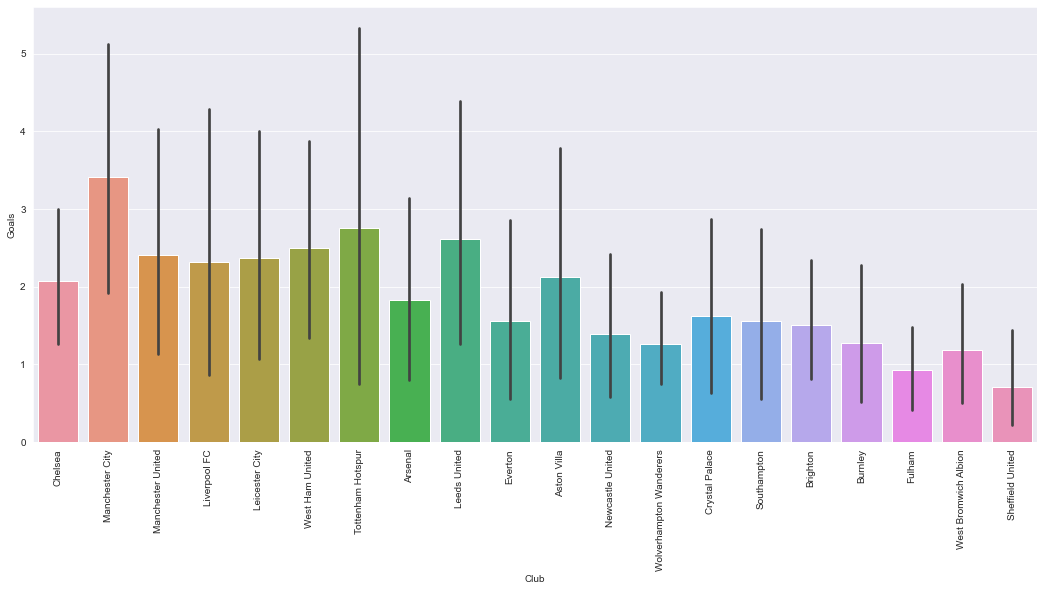

In [118]:
plt.figure(figsize=(18,8));
sns.barplot(x = df['Club'] , y = df['Goals']);
plt.xticks(rotation=90);
plt.show()

> Manchester City scored the most goals in the league with 80+ goals and Sheffield United scored the least goals scoring just under 20.

#### Who scored the most goals during the season?

In [119]:
Data_New = pd.DataFrame(df.groupby(['Club','Name'])['Goals'].sum().sort_values(ascending=False).head())

In [32]:
#plt.figure(figsize=(18,8));
#sns.barplot(x = df['Name'] , y = df['Goals'] , data = Data_New);
#plt.xticks(rotation=90);
#plt.show()

In [121]:
top_scorers= df.sort_values(by="Goals", ascending=False)[:5]
top_scorers= df.sort_values(by="Goals", ascending=False).head()
top_scorers

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
162,Harry Kane,Tottenham Hotspur,ENG,FW,27,35,35,3082,23,14,937,Harry Kane,4,4,0.60,0.22,1,0
81,Mohamed Salah,Liverpool FC,EGY,FW,28,37,34,3078,22,5,1288,Mohamed Salah,6,6,0.61,0.18,0,0
51,Bruno Fernandes,Manchester United,POR,MF,25,37,35,3099,18,12,2283,Bruno Fernandes,9,10,0.45,0.32,6,0
161,Son Heung-min,Tottenham Hotspur,KOR,FW,28,37,36,3114,17,10,1199,Son Heung-min,1,1,0.30,0.26,0,0
214,Patrick Bamford,Leeds United,ENG,FW,26,38,37,3050,17,7,506,Patrick Bamford,2,2,0.51,0.12,3,0


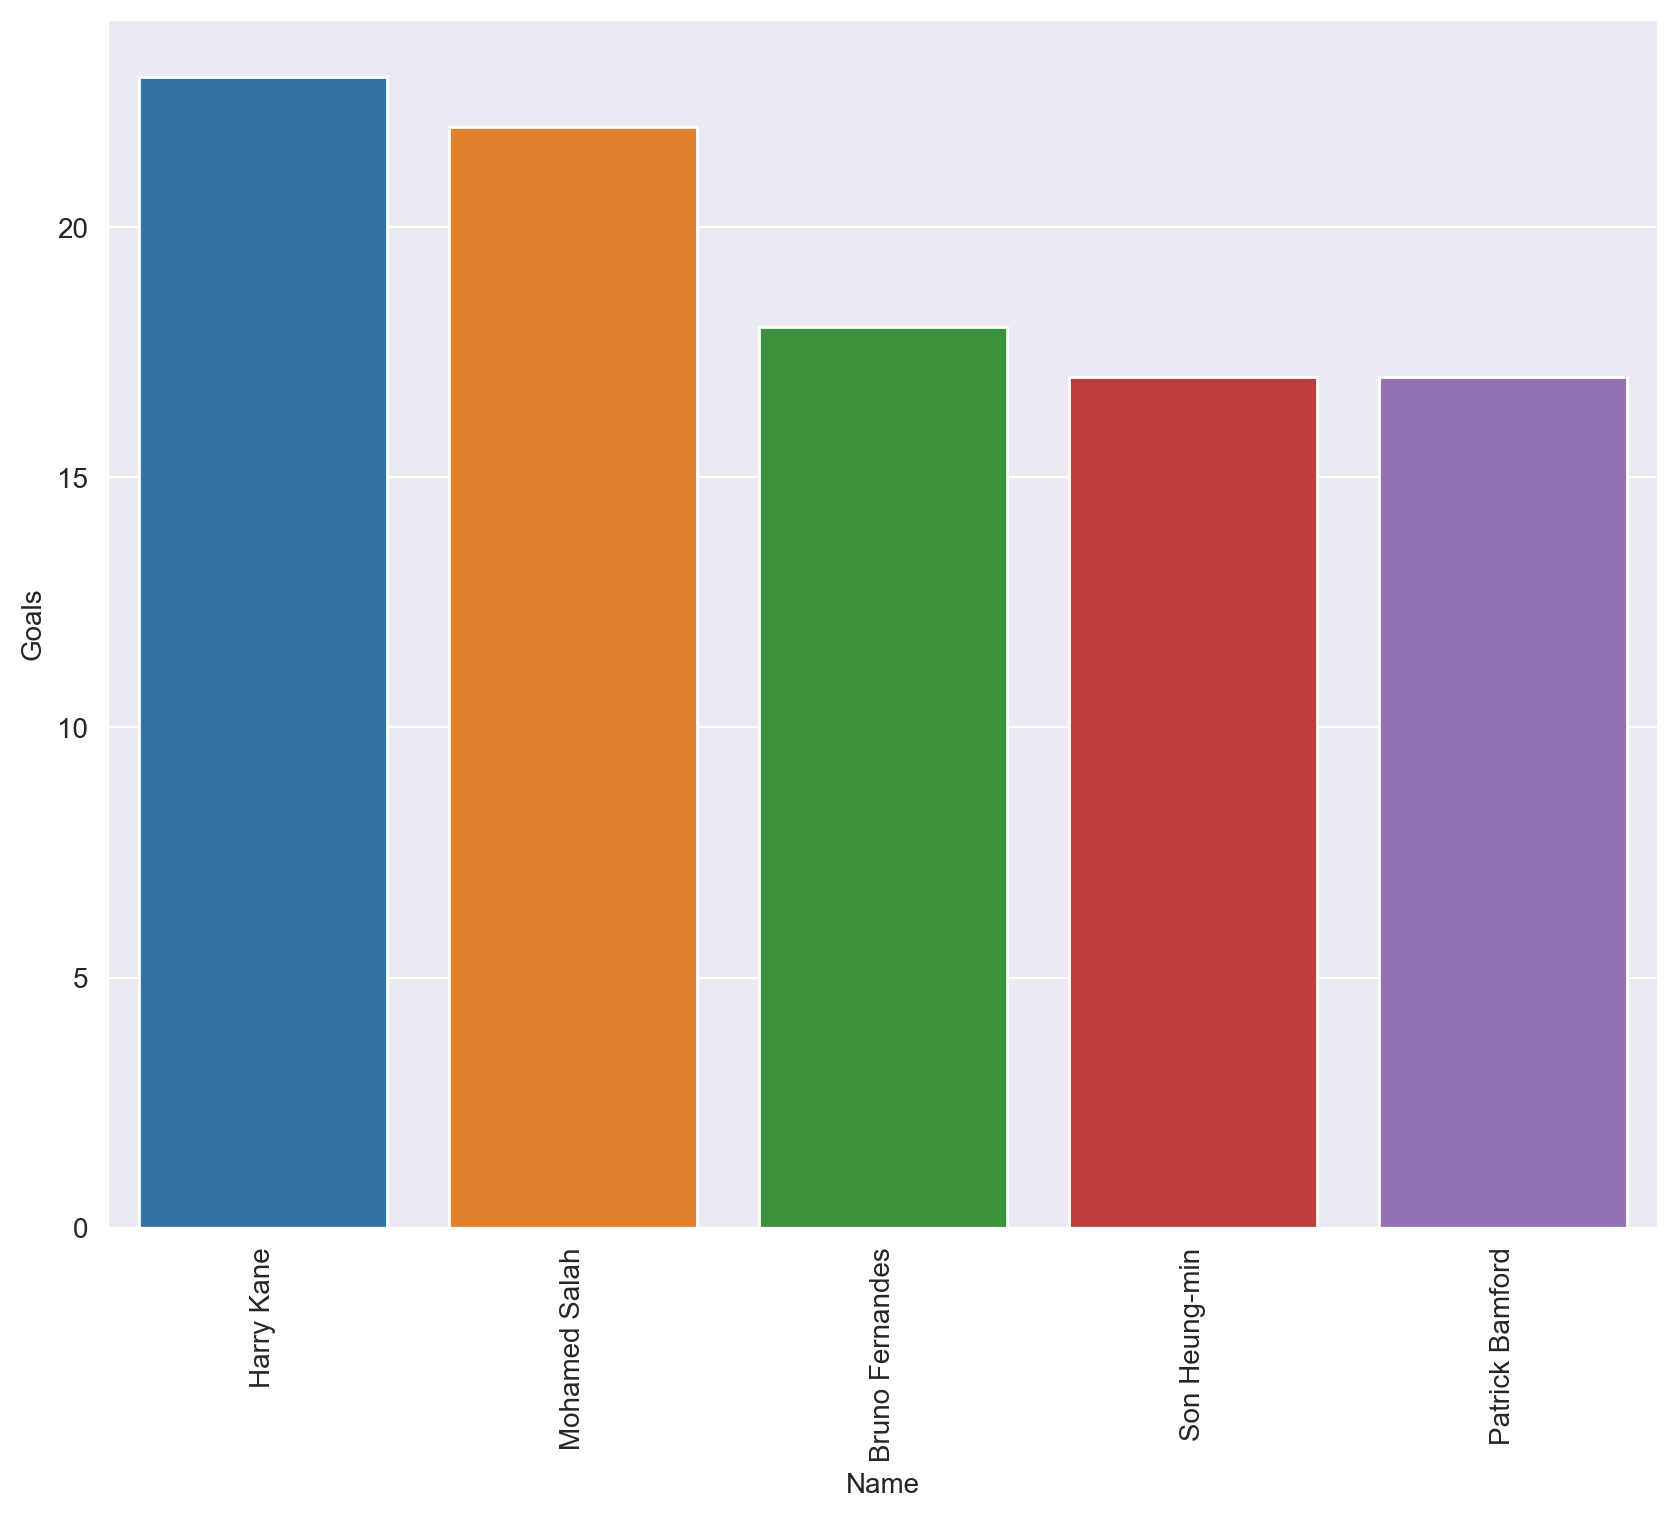

In [122]:
plt.figure(figsize=(10,8),dpi=200);
sns.barplot(x = 'Name' , y ='Goals' , data = top_scorers);
plt.xticks(rotation=90);
plt.show()

- Harry kane is the top scorer of the league with 23 Goals followed by
- Mohammed salah with 22 Goals

In [123]:
 pd.DataFrame(df.groupby(['Club','Name'])['Assists'].sum().sort_values(ascending=False).head())

,,Assists
Club,Name,
Tottenham Hotspur,Harry Kane,14
Manchester City,Kevin De Bruyne,12
Manchester United,Bruno Fernandes,12
Tottenham Hotspur,Son Heung-min,10
Aston Villa,Jack Grealish,10


In [124]:
assists_scorers= df.sort_values(by="Assists", ascending=False)[:5]
assists_scorers

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
162,Harry Kane,Tottenham Hotspur,ENG,FW,27,35,35,3082,23,14,937,Harry Kane,4,4,0.60,0.22,1,0
51,Bruno Fernandes,Manchester United,POR,MF,25,37,35,3099,18,12,2283,Bruno Fernandes,9,10,0.45,0.32,6,0
34,Kevin De Bruyne,Manchester City,BEL,MF,29,25,23,1997,6,12,1406,Kevin De Bruyne,2,3,0.44,0.46,1,0
273,Jack Grealish,Aston Villa,ENG,"FW,MF",24,26,24,2185,6,10,1100,Jack Grealish,0,0,0.18,0.35,6,0
161,Son Heung-min,Tottenham Hotspur,KOR,FW,28,37,36,3114,17,10,1199,Son Heung-min,1,1,0.30,0.26,0,0


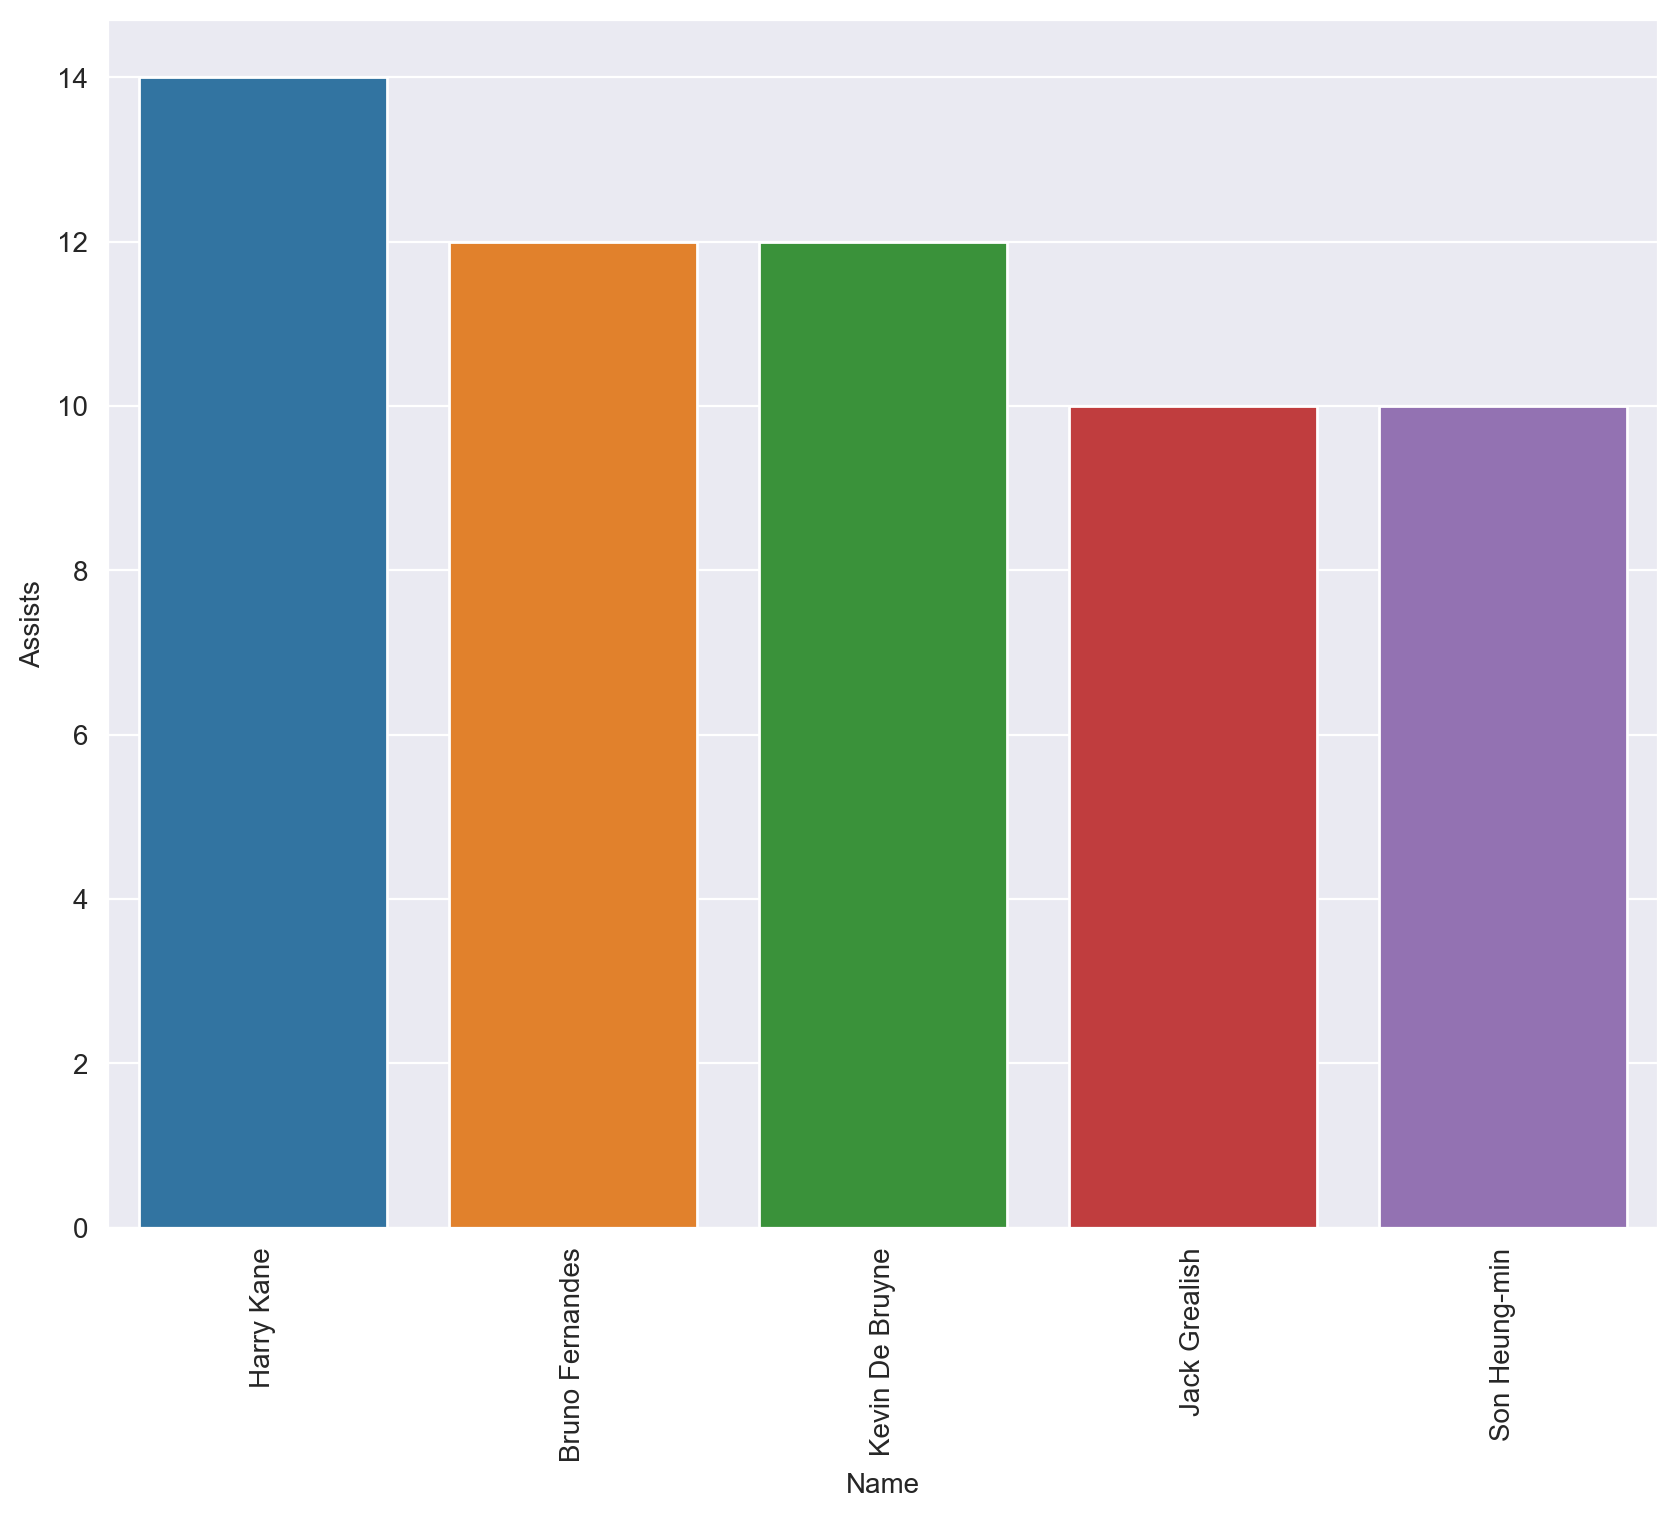

In [125]:
plt.figure(figsize=(10,8),dpi=200);
sns.barplot(x = 'Name' , y ='Assists' , data = assists_scorers);
plt.xticks(rotation=90);
plt.show()

#### Which club was the most aggressive on the pitch?

In [126]:
df.head(1)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,Mason Mount,1,1,0.21,0.24,2,0


In [127]:
defender = df[df['Position'] == 'DF']

In [128]:
defender['total_cards'] = defender['Red_Cards'] + defender['Yellow_Cards']

<ipython-input-128-50929403aaf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defender['total_cards'] = defender['Red_Cards'] + defender['Yellow_Cards']


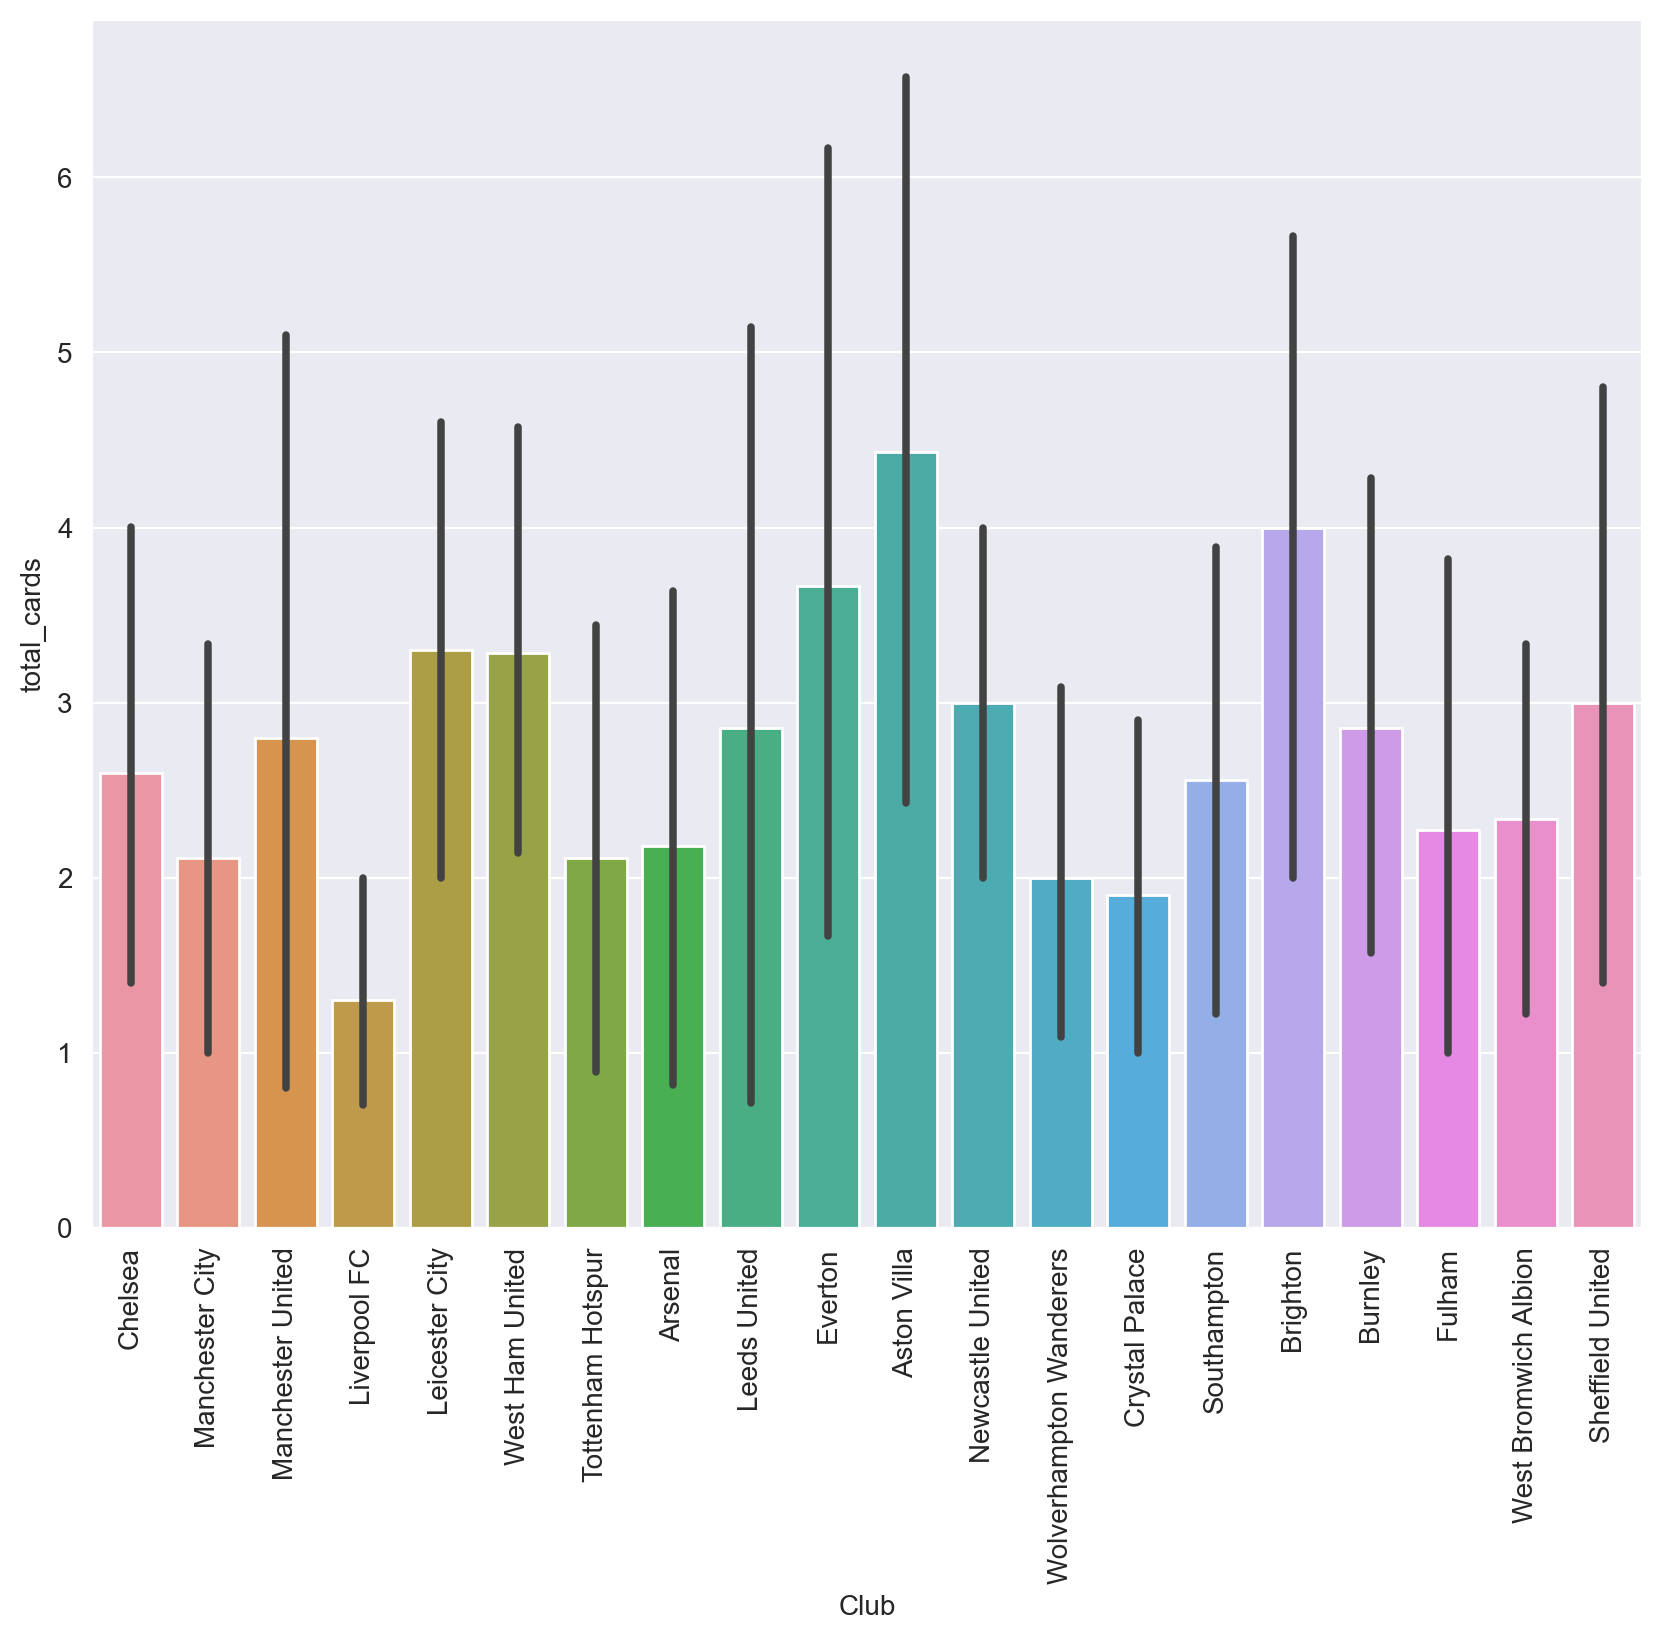

In [129]:
plt.figure(figsize=(10,8),dpi=200);
sns.barplot(x = 'Club' , y ='total_cards' , data = defender);
plt.xticks(rotation=90);
plt.show()

- Aston Villa had the highest percentile of total cards

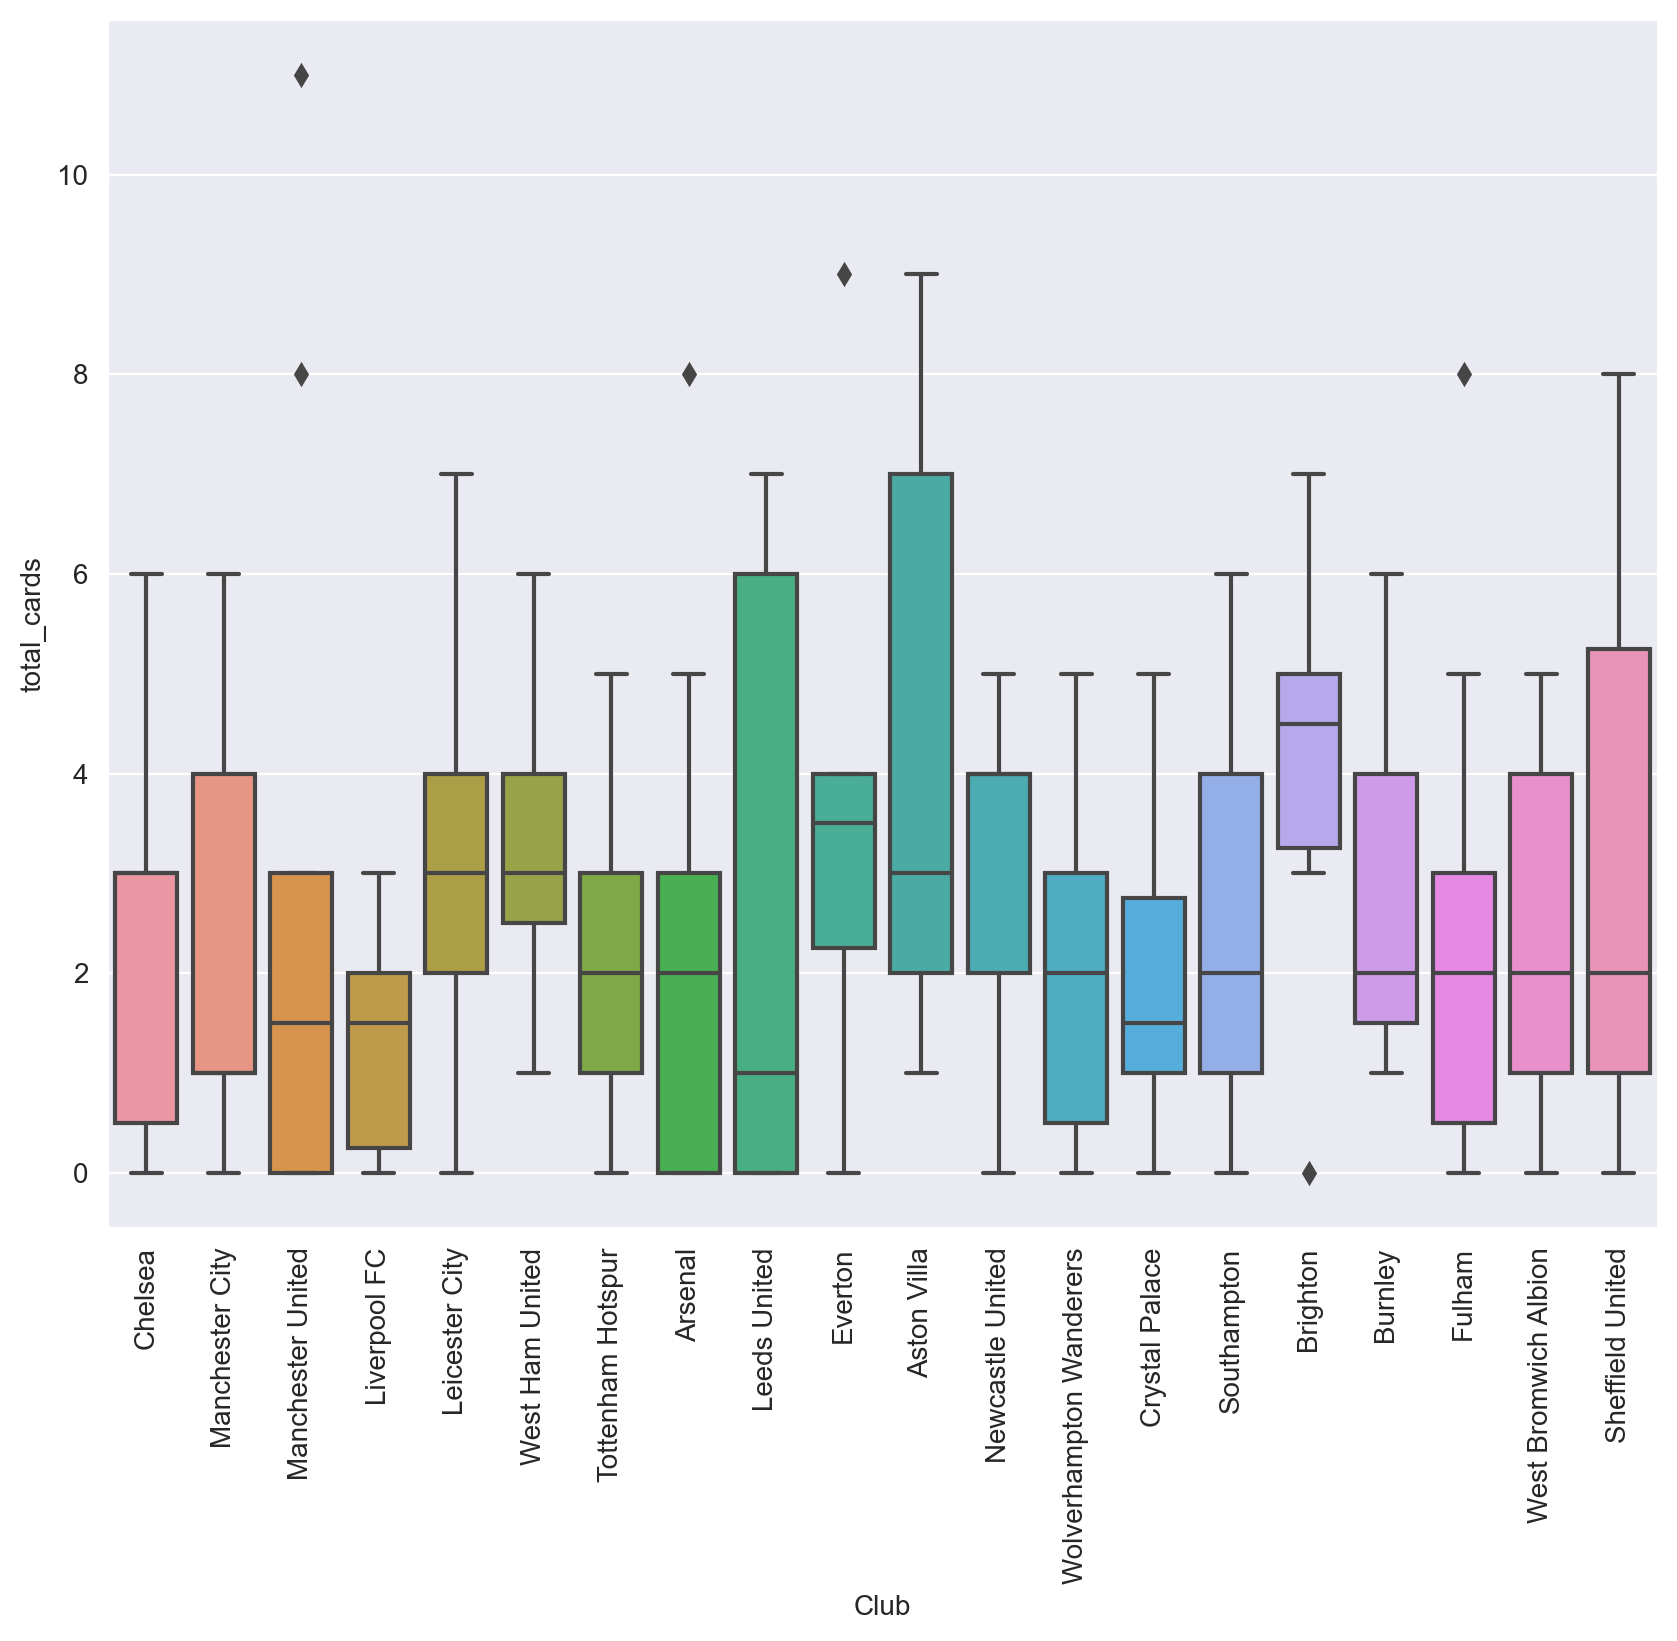

In [130]:
plt.figure(figsize=(10,8),dpi=200);
sns.boxplot(x = 'Club' , y ='total_cards' , data = defender);
plt.xticks(rotation=90);
plt.show()

In [132]:
Aston= defender[defender['Club']=='Aston Villa']
Aston[Aston['total_cards']==Aston['total_cards'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,total_cards
272,Matty Cash,Aston Villa,ENG,DF,22,28,28,2372,0,2,1298,Matty Cash,0,0,0.01,0.08,8,1,9


>Aston Villa have 8 yellow cards and 1 red cards 

In [133]:
df.head(1)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,Mason Mount,1,1,0.21,0.24,2,0



- Who scored the most goals during the season?

- Who made the most number of assisits?

- Who had the biggest number of passes attempted?

- Who scored penalties more than other players?

- Who missed the biggest number of penalties during the season?

- Who are the most aggresive players in the EPL?


,Name,Club,Goals
0,Harry Kane,Tottenham Hotspur,23
1,Mohamed Salah,Liverpool FC,22
2,Bruno Fernandes,Manchester United,18
3,Son Heung-min,Tottenham Hotspur,17
4,Patrick Bamford,Leeds United,17
5,Dominic Calvert-Lewin,Everton,16
6,Jamie Vardy,Leicester City,15
7,Ollie Watkins,Aston Villa,14
8,İlkay Gündoğan,Manchester City,13
9,Alexandre Lacazette,Arsenal,13


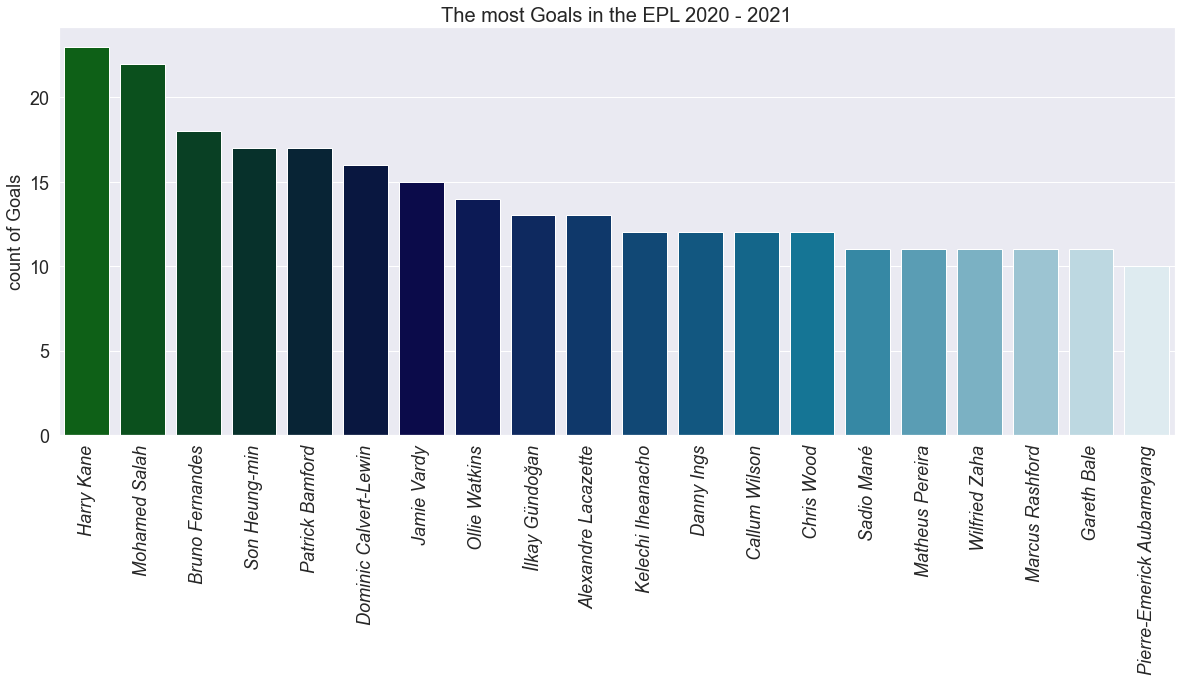

,Name,Club,Assists
0,Harry Kane,Tottenham Hotspur,14
1,Bruno Fernandes,Manchester United,12
2,Kevin De Bruyne,Manchester City,12
3,Jack Grealish,Aston Villa,10
4,Son Heung-min,Tottenham Hotspur,10
5,Raphael Dias Belloli,Leeds United,9
6,Jamie Vardy,Leicester City,9
7,Marcus Rashford,Manchester United,9
8,Pascal Groß,Brighton,8
9,Jack Harrison,Leeds United,8


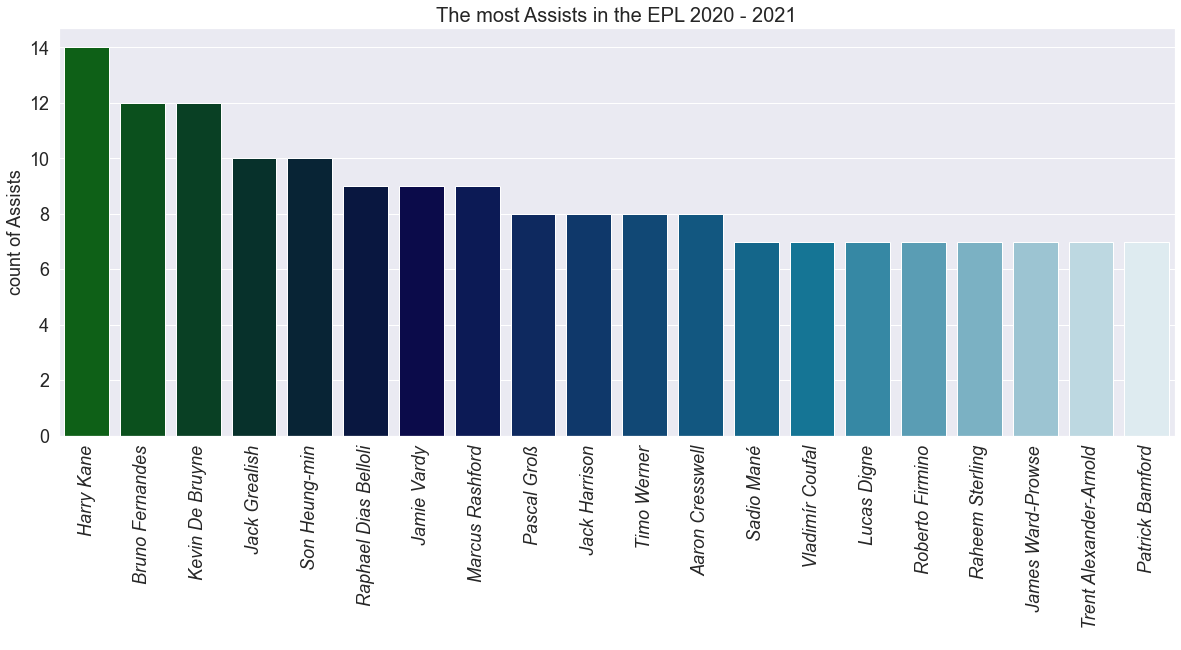

,Name,Club,Passes_Attempted
0,Andrew Robertson,Liverpool FC,3214
1,Trent Alexander-Arnold,Liverpool FC,2941
2,Rodri,Manchester City,2728
3,Pierre Højbjerg,Tottenham Hotspur,2687
4,Rúben Dias,Manchester City,2671
5,Luke Ayling,Leeds United,2661
6,James Ward-Prowse,Southampton,2619
7,Youri Tielemans,Leicester City,2559
8,Bruno Fernandes,Manchester United,2283
9,Stuart Dallas,Leeds United,2212


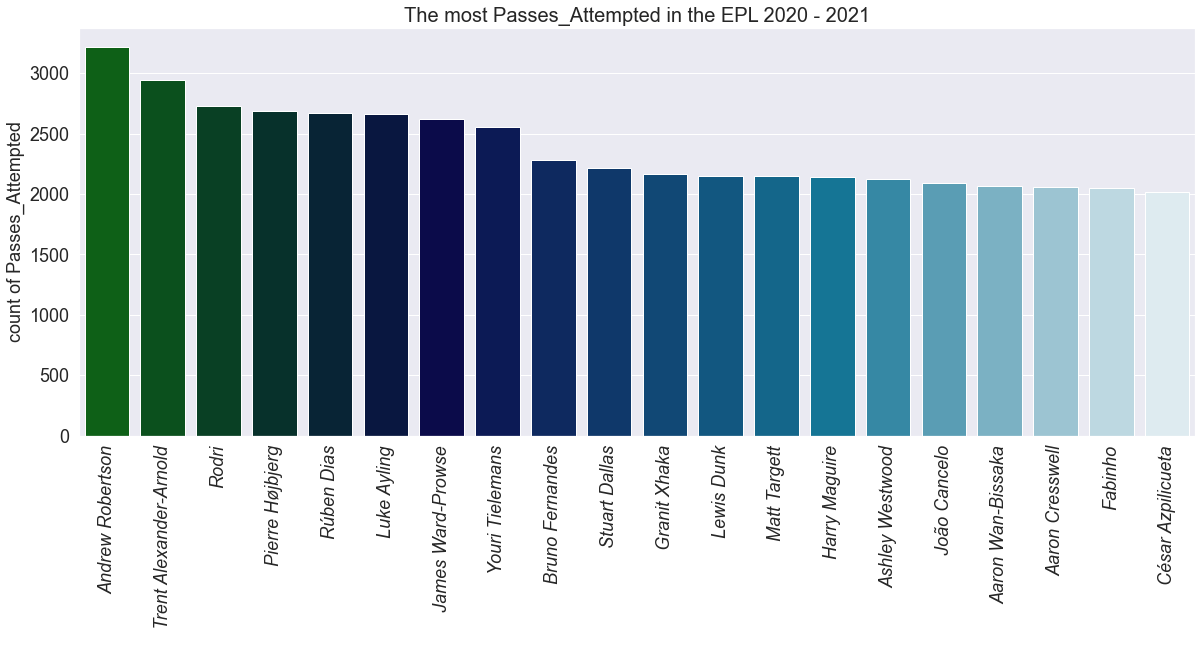

,Name,Club,Penalty_Goals
0,Bruno Fernandes,Manchester United,9
1,Jamie Vardy,Leicester City,8
2,Jorginho,Chelsea,7
3,Mohamed Salah,Liverpool FC,6
4,Matheus Pereira,West Bromwich Albion,4
5,Harry Kane,Tottenham Hotspur,4
6,Callum Wilson,Newcastle United,4
7,Anwar El Ghazi,Aston Villa,4
8,Alexandre Lacazette,Arsenal,3
9,James Ward-Prowse,Southampton,3


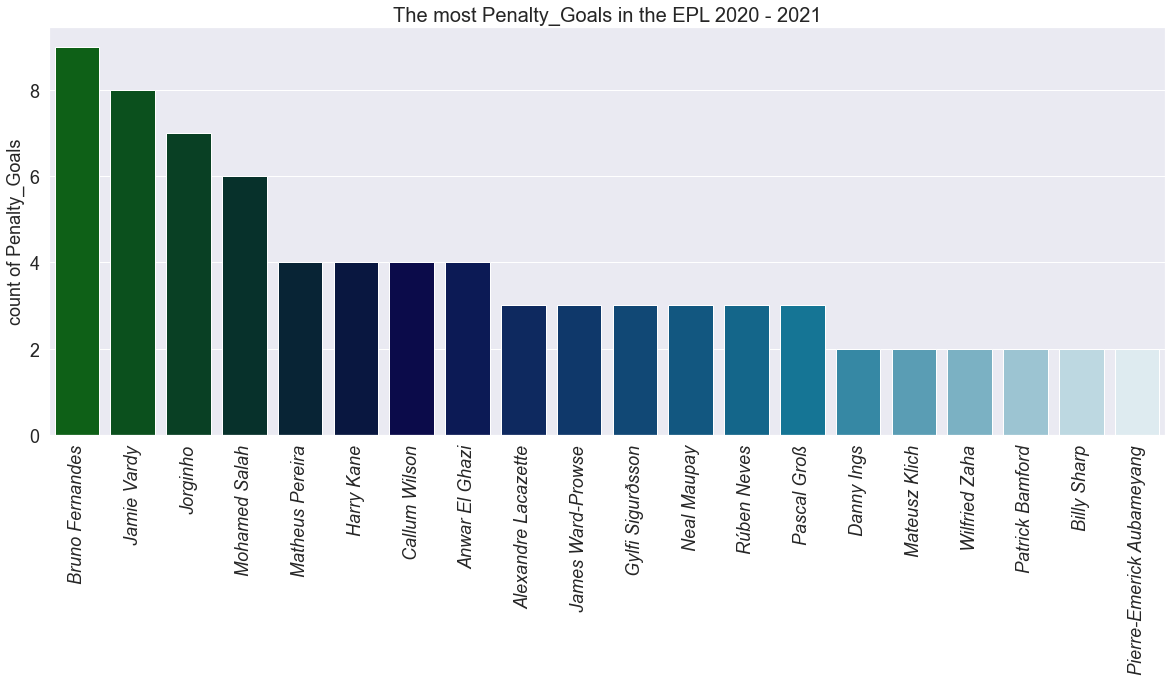

,Name,Club,Penalty_Attempted
0,Bruno Fernandes,Manchester United,10
1,Jorginho,Chelsea,9
2,Jamie Vardy,Leicester City,9
3,Mohamed Salah,Liverpool FC,6
4,Harry Kane,Tottenham Hotspur,4
5,Callum Wilson,Newcastle United,4
6,Pascal Groß,Brighton,4
7,Anwar El Ghazi,Aston Villa,4
8,Gylfi Sigurðsson,Everton,4
9,Neal Maupay,Brighton,4


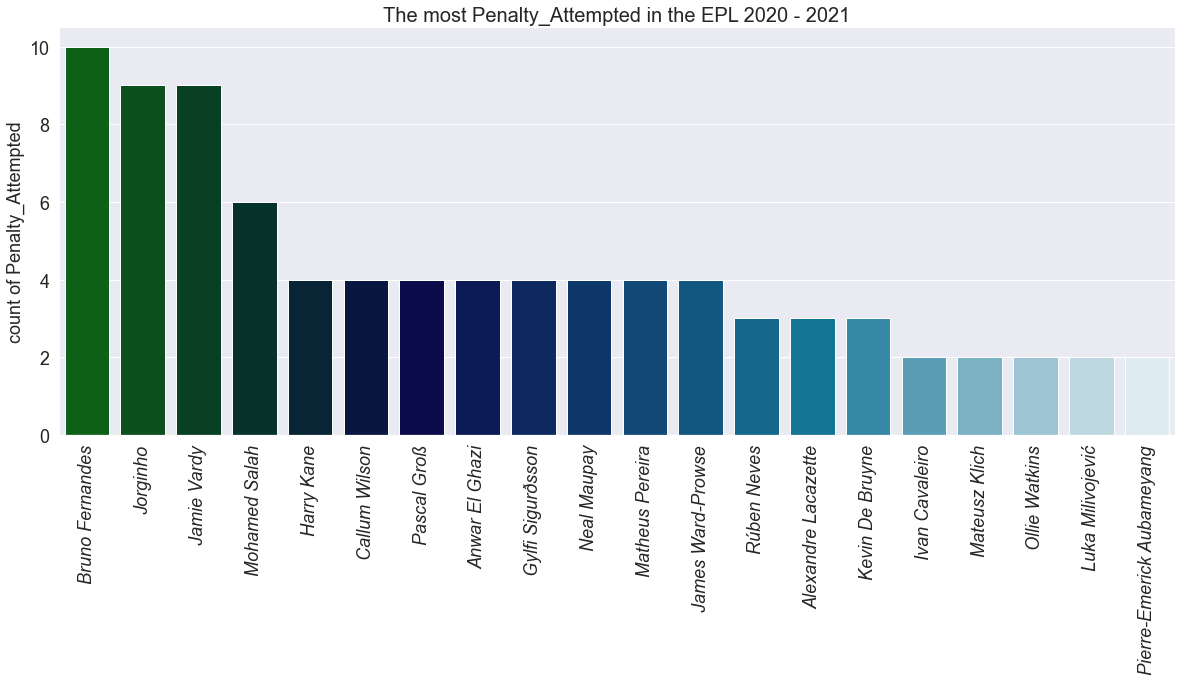

,Name,Club,Yellow_Cards
0,John McGinn,Aston Villa,12
1,Harry Maguire,Manchester United,11
2,Conor Gallagher,West Bromwich Albion,11
3,Douglas Luiz,Aston Villa,10
4,Kalvin Phillips,Leeds United,10
5,Mason Holgate,Everton,9
6,Pierre Højbjerg,Tottenham Hotspur,9
7,John Lundstram,Sheffield United,8
8,Matty Cash,Aston Villa,8
9,Luka Milivojević,Crystal Palace,8


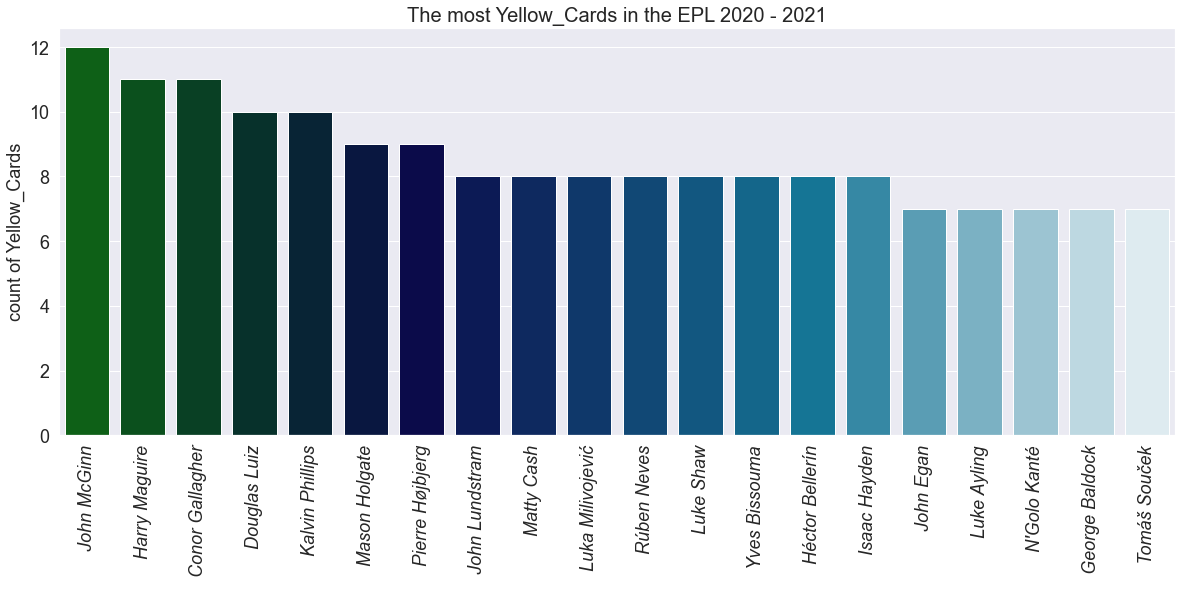

,Name,Club,Red_Cards
0,Lewis Dunk,Brighton,2
1,Ryan Fraser,Newcastle United,1
2,Neal Maupay,Brighton,1
3,Tyrone Mings,Aston Villa,1
4,Bernd Leno,Arsenal,1
5,John Egan,Sheffield United,1
6,Semi Ajayi,West Bromwich Albion,1
7,Gabriel Dos Santos,Arsenal,1
8,Phil Jagielka,Sheffield United,1
9,Tomáš Souček,West Ham United,1


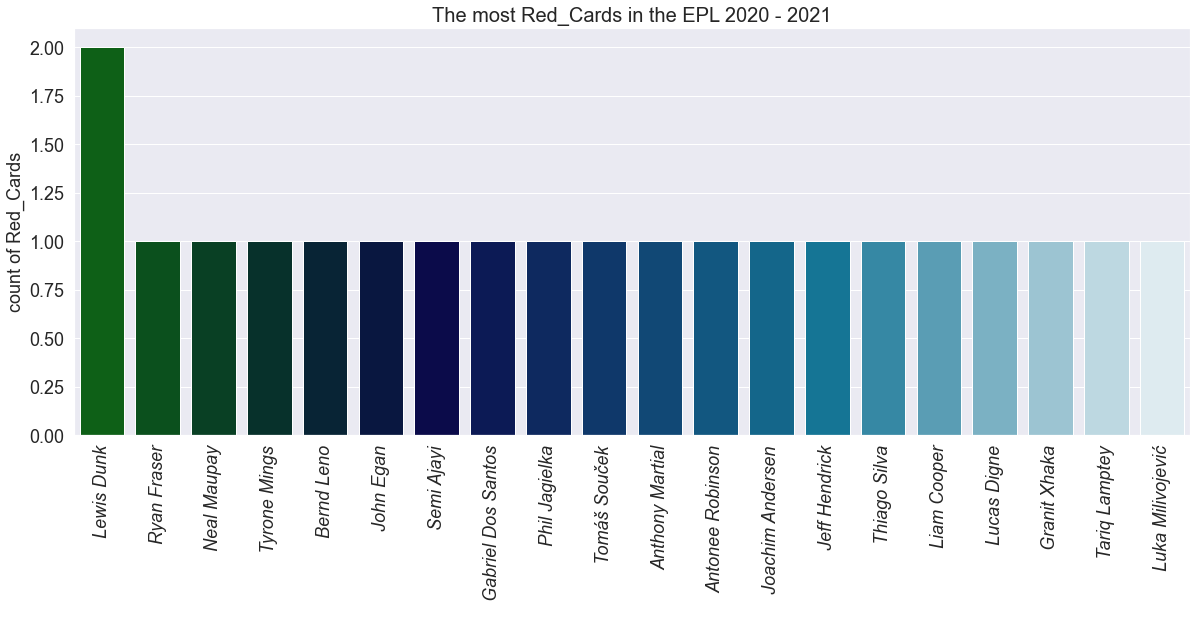

In [168]:
v = ['Goals','Assists','Passes_Attempted','Penalty_Goals','Penalty_Attempted','Yellow_Cards','Red_Cards']
for colname in v:
    x = x=pd.DataFrame(df.groupby(['Name','Club'])[colname].sum().reset_index(drop=False).sort_values(by=colname,ascending=False).head(20).reset_index(drop=True))
    display(x)
    sns.set(rc={'figure.figsize':(20,7.5)})
    sns.barplot(x='Name',y=colname,data=x,palette="ocean",order=x['Name'].tail(20))
    plt.title('The most {} in the EPL 2020 - 2021'.format(colname),fontsize=20)
    plt.ylabel('count of {}'.format(colname),fontsize=18)
    plt.xlabel(' ')
    plt.xticks(ticks=np.arange(0,20,1),labels=x['Name'],fontsize=18,style='oblique',rotation=90)
    plt.yticks(fontsize=18)
    plt.show()